<a href="https://colab.research.google.com/github/PrasadM033/Climate_Change_Analysis/blob/main/POS_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## POS Tagging

## What POS (Part-of-speech)?
POS are Word categories.

* What are lexical categories and how are they used in natural language processing?
* How we can automatically tag the sequence of words/tokens

**POS Tagging** is the process of assigning the word categories to a sequence of tokens (automatically).

There are different collections of tags that can be used for the task of POS Tagging. These collections are called **Tagset**.

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
nltk.pos_tag("The boy asked to perform dance".split())

[('The', 'DT'),
 ('boy', 'NN'),
 ('asked', 'VBD'),
 ('to', 'TO'),
 ('perform', 'VB'),
 ('dance', 'NN')]

In [ ]:
nltk.pos_tag("She told that he was good at painting".split())

[('She', 'PRP'),
 ('told', 'VBD'),
 ('that', 'IN'),
 ('he', 'PRP'),
 ('was', 'VBD'),
 ('good', 'JJ'),
 ('at', 'IN'),
 ('painting', 'VBG')]

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
txt = "Sukanya, Rajib and Naba are my good friends. "

wordsList = nltk.word_tokenize(txt)
tagged = nltk.pos_tag(wordsList)
print(tagged)

[('Sukanya', 'NNP'), (',', ','), ('Rajib', 'NNP'), ('and', 'CC'), ('Naba', 'NNP'), ('are', 'VBP'), ('my', 'PRP$'), ('good', 'JJ'), ('friends', 'NNS'), ('.', '.')]


In [8]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

#can you guess the pos-tags?
#pos_tags = nltk.pos_tag(text.split())

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

### Tagging a token

In [9]:
#Representing Tagged Tokens
tagged_token = nltk.tag.str2tuple('fly/NN')

tagged_token

('fly', 'NN')

In [10]:
#tagged corpus
nltk.download('brown')
nltk.corpus.brown.tagged_words()


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [11]:
nltk.download('indian')
nltk.corpus.indian.tagged_words()


[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Unzipping corpora/indian.zip.


[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

### Universal Tagset

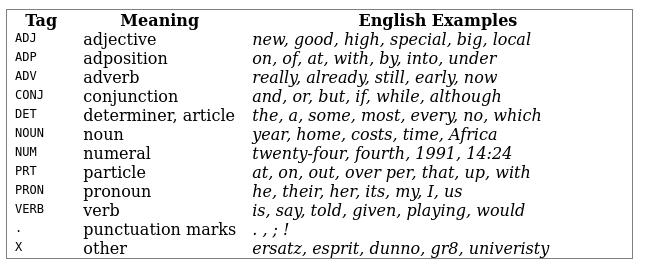

# POS TAGS

* **NOUN** : Nouns generally refer to people, places, things, or concepts
* **VERBS**: Verbs are words that describe events and actions,
* **Adjectives and Adverbs**: Adjectives describe nouns and  Adverbs modify verbs to specify the time, manner, place or direction of the event


In [13]:
nltk.download('universal_tagset')
nltk.corpus.brown.tagged_words(tagset='universal')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Find the most common tags precide a NOUN

In [14]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [15]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [ ]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']


In [ ]:
## Different nouns
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
  print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

## Exploring Tagged corpus

Suppose we're studying the word often and want to see how it is used in text. We could ask to see the words that follow often

In [ ]:
brown_learned_text = brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

In [ ]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()
#Notice that the most high-frequency parts of speech following often are verbs.
#Nouns never appear in this position (in this particular corpus).

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [ ]:
word_tag_fd = nltk.FreqDist(wsj)
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()


[('VERB', 28), ('NOUN', 20)]

In [ ]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [ ]:
# Find the most frequent tags

def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())



tagdict = findtags('VB', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
  print(tag, tagdict[tag])

VB [('get', 66), ('take', 48), ('make', 43), ('go', 40), ('see', 38)]
VB+PPO [("let's", 1)]
VB-HL [('know', 2), ('attend', 2), ('Ask', 1), ('solve', 1), ('Issue', 1)]
VB-TL [('Hail', 2), ('Come', 1), ('Fall', 1), ('Stay', 1), ('Go', 1)]
VBD [('said', 382), ('took', 47), ('told', 45), ('made', 44), ('got', 42)]
VBD-HL [('Faced', 1), ('Led', 1), ('played', 1), ('kept', 1), ('Held', 1)]
VBD-TL [('Fingered', 1)]
VBG [('making', 22), ('going', 22), ('playing', 20), ('coming', 19), ('getting', 17)]
VBG-HL [('revolving', 1), ('lacking', 1), ('Nursing', 1), ('nursing', 1), ('Underlying', 1)]
VBG-TL [('Living', 3), ('Planning', 2), ('Purchasing', 1), ('Acting', 1), ('Publishing', 1)]
VBN [('made', 62), ('given', 37), ('expected', 35), ('taken', 30), ('held', 26)]
VBN-HL [('expected', 3), ('needed', 3), ('held', 3), ('charged', 2), ('criticized', 2)]
VBN-TL [('United', 57), ('Inc.', 7), ('Allied', 6), ('Illustrated', 3), ('Diversified', 3)]
VBN-TL-HL [('United', 1)]
VBZ [('says', 28), ('seems', 

### Finding the distribution of Tags

### Finding the patterns

In [ ]:
def process(sentence):
  for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
    if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
      print(w1, w2, w3)

for tagged_sent in brown.tagged_sents():
  process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

KeyboardInterrupt: 

### Automatic Tagging

#### Default Tagger

In [ ]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [ ]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [ ]:
brown_tagged_sents = brown.tagged_sents()
default_tagger.evaluate(brown_tagged_sents)

<ipython-input-40-e624ab80ede5>:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  default_tagger.evaluate(brown_tagged_sents)


0.13130472824476916

#### Regular Expression Tagger

In [ ]:
patterns = [(r'.*ing$', 'VBG'),                # gerunds
(r'.*ed$', 'VBD'),                 # simple past
(r'.*es$', 'VBZ'),                 # 3rd singular present
(r'.*ould$', 'MD'),                # modals
(r'.*\'s$', 'NN$'),                # possessive nouns
(r'.*s$', 'NNS'),                  # plural nouns
(r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
(r'.*', 'NN')                      # nouns (default)
]

In [ ]:
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.evaluate(brown_tagged_sents)

<ipython-input-43-d4e890cdf365>:2: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  regexp_tagger.evaluate(brown_tagged_sents)


0.19485235861080683

In [ ]:
regexp_tagger.tag("The boy is playing".split())

[('The', 'NN'), ('boy', 'NN'), ('is', 'NNS'), ('playing', 'VBG')]

#### Unigram Tagger

In [ ]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [ ]:
unigram_tagger.evaluate(brown_tagged_sents)

<ipython-input-49-2be150522e1a>:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  unigram_tagger.evaluate(brown_tagged_sents)


0.9349006503968017

#### Combining **Tagger**

In [ ]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]

In [ ]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

<ipython-input-53-f8285b5e87f6>:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  t2.evaluate(test_sents)


0.8452108043456593

## Spacy -for POS Tagging


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = ("""My name is Shaurya Uppal.  I enjoy writing articles on GeeksforGeeks checkout my other article by going to my profile section.""")

doc = nlp(text)


for token in doc:
  print(token, token.pos_)


My PRON
name NOUN
is AUX
Shaurya PROPN
Uppal PROPN
. PUNCT
  SPACE
I PRON
enjoy VERB
writing VERB
articles NOUN
on ADP
GeeksforGeeks PROPN
checkout VERB
my PRON
other ADJ
article NOUN
by ADP
going VERB
to ADP
my PRON
profile NOUN
section NOUN
. PUNCT


In [ ]:

print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"])

Verbs: ['enjoy', 'writing', 'checkout', 'going']


## Try yourself

Q1. Write code to search the Brown Corpus for particular words and phrases according to tags, to answer the following questions:

1. Produce an alphabetically sorted list of the distinct words tagged as MD.
1. Identify words that can be plural nouns or third person singular verbs (e.g. deals, flies).
1. Identify three-word prepositional phrases of the form IN + DET + NN (eg. in the lab).
1. What is the ratio of masculine to feminine pronouns?


Q2. (Optional) Explore Indian tagged corpus available in NLTK. Experiment with different taggers.